## Market Basket Analysis

We will explore the past orders in a shopping mall. The goal is to achieve a competitive advantage in the market by exploiting the value of the data collected from product purchases. We have a dataset including purchase transactions made in the store. 

Analyze the data and try to answer the below questions:

1. What are the 25 most purchased items? Can you describe any insightful pattern in regarding food choices (e.g., junk food *versus* green food) of their customers? Plot graphics to support your findings.

2. What is the probability of each of the 25 most purchased items to appear in a customer's basket?

3. Can we recommend items to customers based on their purchase patterns? Apply the **Apriori algorithm** to find association rules that can be used as recommendations in the future. Which meaningful and/or strange patterns you could find?

4. Discuss how seasonality bias (e.g., a high frequency of Christmas items being purchased in December) in the data can compromise Market Basket Analysis and how to overcome this problem.

**Solution sketch**

1. Load the dataset with Pandas.
2. Use a One-Hot encoding to create a better data representation.
3. Use `.sum()` and `.sort_values()` to find the most frequent items. Probabilities can be computed likewise.
4. Use `seaborn` or `matplotlib` to create plots.
5. Use the `mlxtend` library implementation of Apriori. 

**Sample solution**

In [1]:
%matplotlib inline

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

plt.style.use('seaborn') # Configure plt to use seaborn plot style
plt.rcParams["figure.figsize"] = (12, 5) # Set the figure size for plotting Globally
sns.set(font_scale=0.8)  # Set the font size for all plots

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
dataset = pd.read_csv(os.path.join('Data', 'umall.csv'), header=None)

In [3]:
transactions = []

# Convert items in the dataframe to string
for row in dataset.values:
    transactions.append([str(item) for item in row if str(item) != 'nan']) # Remove missing values

In [4]:
te = TransactionEncoder()
#te_ary = te.fit(transactions).transform(transactions)
te_ary = te.fit_transform(transactions)

In [5]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


### 1. What are the 25 most purchased items? Can you describe any insightful pattern in regarding food choices (e.g., junk food *versus* green food) of their customers? Plot graphics to support your findings.

In [6]:
# 1. Use the sum() method to find item frequencies.
# 2. Sort frequencies using sort_values()
# 3. Select the top 25 products using .head(25)
top25 = df.sum().sort_values(ascending=False).head(25)
print(type(top25))  # pandas.core.series.Series has index and values
top25

<class 'pandas.core.series.Series'>


mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
burgers               654
cake                  608
cookies               603
escalope              595
low fat yogurt        574
shrimp                536
tomatoes              513
olive oil             494
frozen smoothie       475
turkey                469
chicken               450
whole wheat rice      439
grated cheese         393
cooking oil           383
soup                  379
dtype: int64

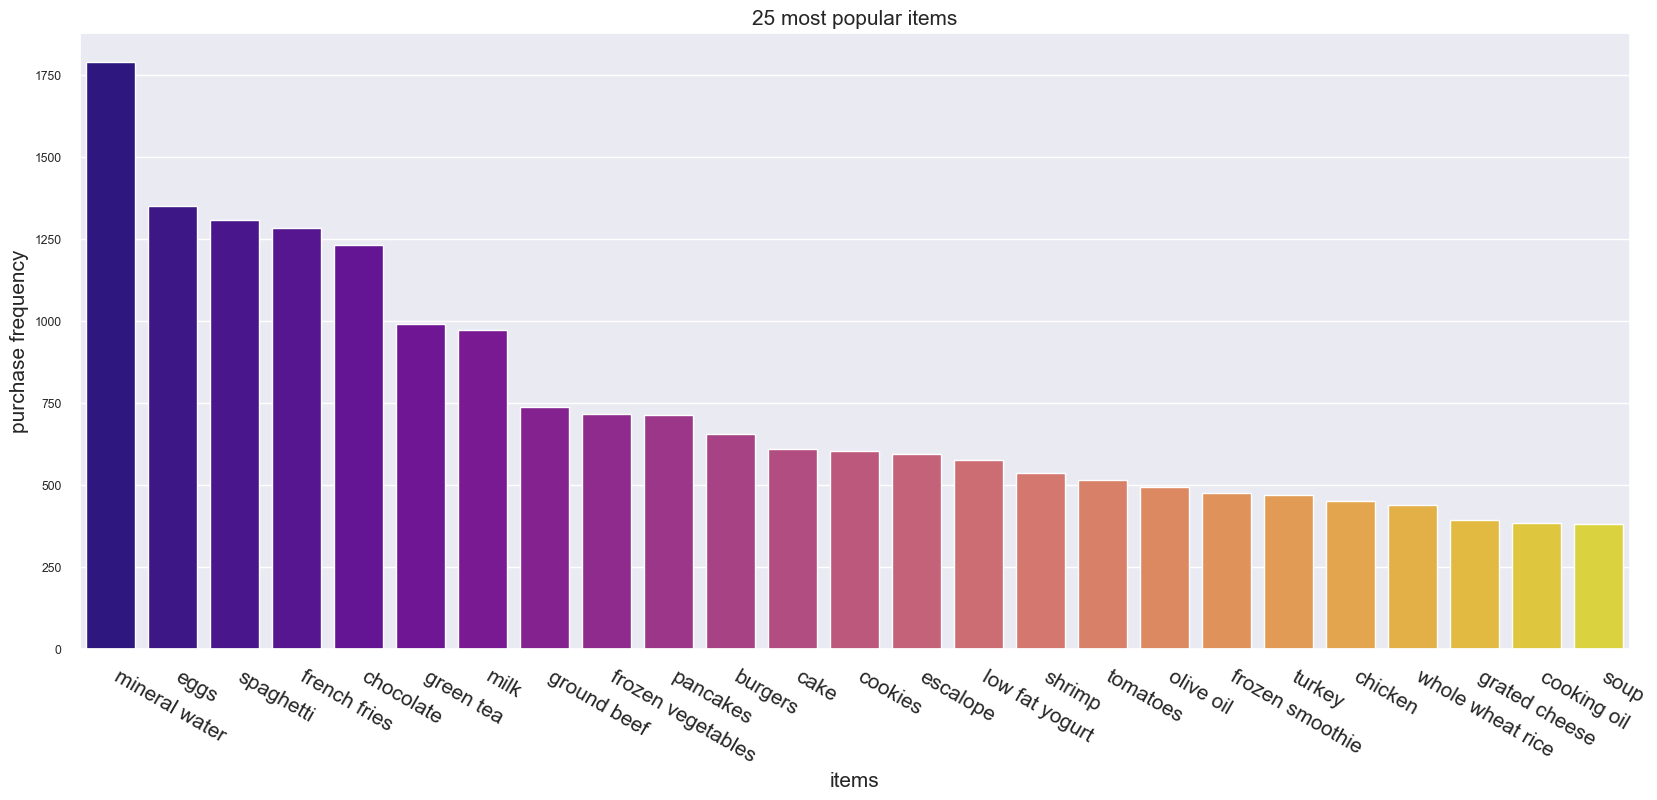

In [7]:
custom_fontsize = 15
fig, ax = plt.subplots(figsize=(20, 8)) # Set figure size
plt.title('25 most popular items', fontsize=custom_fontsize)
plt.xlabel('items', fontsize=custom_fontsize)
plt.ylabel('purchase frequency', fontsize=custom_fontsize)

plt.xticks(ha='left', rotation=-30, fontsize=custom_fontsize) # Rotate x-lables

sns.barplot(x=top25.index, y=top25.values, palette='plasma') # Create a bar chart. Set colormap to "plasma"
plt.show()

**Insights**: 

* Junk food is on the top sales: The top 5 most common items in baskets are mineral watter, eggs, spaghetti, french fries and chocolate.
* The first "green food" to appear is frozen vegetables with purchase frequency around 715.

### 2. What is the probability of each of the 25 most purchased items to appear in a customer's basket?

In [8]:
# In this market basket analysis, the probability of an item or itemset appearing in a transaction is called "support".
print(df.shape[0]) # all items count
support_df = pd.DataFrame(top25/df.shape[0], columns=['Support'])
support_df

7501


,Support
mineral water,0.238368
eggs,0.179709
spaghetti,0.174110
french fries,0.170911
chocolate,0.163845
green tea,0.132116
milk,0.129583
ground beef,0.098254
frozen vegetables,0.095321
pancakes,0.095054


In [9]:
support_df1 = pd.DataFrame(top25/len(df), columns=['Support'])
support_df1.head()

,Support
mineral water,0.238368
eggs,0.179709
spaghetti,0.174110
french fries,0.170911
chocolate,0.163845


**Insights**:

* The probability to have a mineral water in a random basket is ~24%.
* The probability to have a eggs in a random basket is ~17%.

### 3. Can we recommend items to customers based on their purchase patterns? Apply the **Apriori algorithm** to find association rules that can be used as recommendations in the future. Which meaningful and/or strange patterns you could find?

In [10]:
# We extract frequent itemsets mlxtend
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, milk, mineral water)"
253,0.017064,"(ground beef, mineral water, spaghetti)"
254,0.015731,"(milk, mineral water, spaghetti)"
255,0.010265,"(olive oil, mineral water, spaghetti)"


To extract association rules, we use the [lift metric](https://en.wikipedia.org/wiki/Lift_(data_mining)). Lift measures how good an association rule is at classifying cases against a random choice. Lift = 1 means that the probability of occurrence of the antecedent and that of the consequent are independent of each other.

If the lift is > 1, it represents the degree to which occurrences are dependent on one another, and makes those rules potentially useful for predicting the consequent in future data sets.

In [11]:
association_rules(frequent_itemsets, metric='lift', min_threshold=2.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410
1,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
2,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445
3,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902
4,"(mineral water, spaghetti)",(olive oil),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021
5,(olive oil),"(mineral water, spaghetti)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898


According to above table, we can easily say that the dependency between **herb & pepper** and **ground beef** is high since lift score is around 3.3 and the confidence score is promising (~32%). Hence, it would be better to keep them close to increase sales!

### 4. Discuss how seasonality bias (e.g., a high frequency of Christmas items being purchased in December) in the data can compromise Market Basket Analysis and how to overcome this problem.


The insights above are completely data-driven and, therefore, should be interpreted carefully. For instance, if the data refers to purchases made in December, we should consider a bias towards Christmas items, e.g., **turkey could have a higher proportion because of the period.**

In practice, **grouping data by similar months help us to consider the seasonality of items, which may provide additional insights (e.g., desing offers targeted to specific holidays).**

#### End of Case Study